In [1]:
import pandas as pd
import folium as g

In [2]:
data=pd.read_csv('C:/Users/SEC/OneDrive/바탕 화면/AirPollutionSeoul/Measurement_summary.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [4]:
date=data['Measurement date'].unique()

In [5]:
data.drop(['Address'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Latitude          647511 non-null  float64
 3   Longitude         647511 non-null  float64
 4   SO2               647511 non-null  float64
 5   NO2               647511 non-null  float64
 6   O3                647511 non-null  float64
 7   CO                647511 non-null  float64
 8   PM10              647511 non-null  float64
 9   PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 49.4+ MB


In [7]:
lat=data['Latitude'].mean()
lon=data['Longitude'].mean()

In [8]:
m1=g.Map([lat,lon],zoom_start=10)
m2=g.Map([lat,lon],zoom_start=10)

In [9]:
m1

In [10]:
total_value=data[(data['Measurement date']==date[0])].iloc[:,[2,3,8,9]]
total_value.columns

Index(['Latitude', 'Longitude', 'PM10', 'PM2.5'], dtype='object')

In [11]:
value1=[]
value2=[]
for i in range(total_value.shape[0]):
    value1.append([total_value.iloc[i,0],total_value.iloc[i,1],total_value.iloc[i,2]])
    value2.append([total_value.iloc[i,0],total_value.iloc[i,1],total_value.iloc[i,3]])

In [12]:
from folium.plugins import HeatMap

In [13]:
HeatMap(value1).add_to(m1)
HeatMap(value2).add_to(m2)

In [14]:
m1

In [15]:
m2

In [16]:
m1.save('heatmap_10.html')
m2.save('heatmap2.5.html')

In [17]:
y=data[(data['Station code']==101)].iloc[:,4:]

In [18]:
y.columns

Index(['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'], dtype='object')

In [19]:
y

,SO2,NO2,O3,CO,PM10,PM2.5
0,0.004,0.059,0.002,1.2,73.0,57.0
1,0.004,0.058,0.002,1.2,71.0,59.0
2,0.004,0.056,0.002,1.2,70.0,59.0
3,0.004,0.056,0.002,1.2,70.0,58.0
4,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...
25900,0.003,0.026,0.014,0.5,26.0,19.0
25901,0.003,0.024,0.014,0.4,27.0,19.0
25902,0.003,0.014,0.021,0.4,23.0,18.0
25903,0.003,0.022,0.014,0.5,20.0,19.0


In [20]:
x =range(24)

In [21]:
SO2 = y.iloc[:24,0]
NO2 = y.iloc[:24,1]
O3  = y.iloc[:24,2]
CO  = y.iloc[:24,3]
PM10= y.iloc[:24,4]
PM25= y.iloc[:24,5]

In [22]:
from matplotlib import pyplot as plt

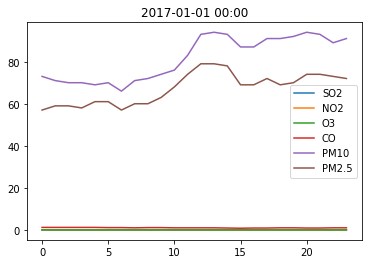

In [23]:
plt.plot(x,SO2)
plt.plot(x,NO2)
plt.plot(x,O3)
plt.plot(x,CO)
plt.plot(x,PM10)
plt.plot(x,PM25)

plt.legend(y.columns)
plt.title(date[0])
plt.show()

In [24]:
start=365*24*2
end=365*24*2+24

In [25]:
SO2 = y.iloc[start:end,0]
NO2 = y.iloc[start:end,1]
O3  = y.iloc[start:end,2]
CO  = y.iloc[start:end,3]
PM10= y.iloc[start:end,4]
PM25= y.iloc[start:end,5]

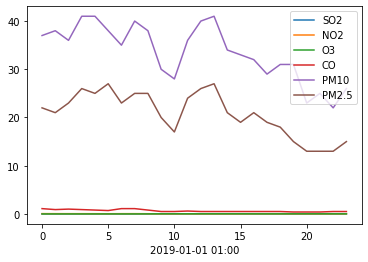

In [26]:
plt.plot(x,SO2)
plt.plot(x,NO2)
plt.plot(x,O3)
plt.plot(x,CO)
plt.plot(x,PM10)
plt.plot(x,PM25)

plt.legend(data.columns[4:])
plt.xlabel(date[start])
plt.show()